#### 1 引入依赖

In [16]:
import numpy as np
import matplotlib.pyplot as plt

#### 2 导入数据

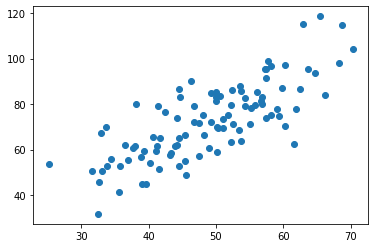

In [17]:
# genfromtxt方法，按行读取（data.csv每行之间一个，隔开），返回矩阵，第一个参数为带后缀文件名字，第二个为分割符号
points = np.genfromtxt('data.csv', delimiter = ',')

# 提取points中两列数据，分别作为x,y
x = points[:, 0]
y = points[:, 1]

# 画出散点图
plt.scatter(x, y)

#### 3 定义损失函数（这个函数取最小值时，得到求解函数的系数）

In [18]:
# 损失函数即为系数(y = w*x + b)的函数，另外还要传入数据的x,y
def compute_cost(w, b, points):
    total_cost = 0
    M = len(points)
    
    # 逐点计算平方损失误差，然后求平均数
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - w * x - b)**2
    return total_cost/M

#### 4 定义拟合函数

In [21]:
# 拟合函数就是调整系数w，b 使得得到的total_cost最小
# 先定义一个求平均值的函数
def average(data):
    sum = 0
    num = len(data)
    for i in range(num):
        sum += data[i]
    return sum/num

# 定义核心拟合函数
def fit(points):
    M = len(points)
    x_bar = average(points[:,0])
    
    sum_yx = 0
    sum_y = 0
    sum_x2 = 0
    sum_delta = 0
    
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        sum_yx += y * x
        sum_y += y
        sum_x2 += x**2

    # 根据公式计算w
    w = (sum_yx - x_bar * sum_y) / (sum_x2 - M* (x_bar**2))
    
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        sum_delta += (y - w*x)
    
    # 根据公式计算b
    b = sum_delta / M

    return w,b

#### 4 测试

In [24]:
w, b = fit(points)

print("w is: ", w)
print("b is: ", b)

cost = compute_cost(w, b, points)

print("cost is: ", cost)

w is:  1.3224310227553753
b is:  7.991020982269626
cost is:  110.25738346621314


#### 5 画出拟合曲线

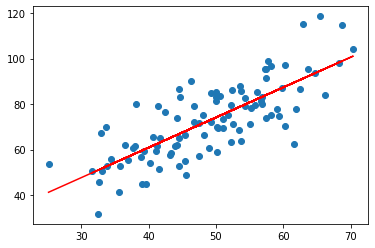

In [25]:
plt.scatter(x, y)
# 针对每一个x，计算出预测的y值
pred_y = w * x + b

plt.plot(x, pred_y, c='r')
plt.show()